# GP Regression Demo
This demonstration covers the basics of a supervised learning problem with gptorch:
* Defining a model
* Training the model
* Predicting with the model

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from gptorch.models.gpr import GPR
from gptorch.models.sparse_gpr import VFE
from gptorch import kernels
from gptorch.util import TensorType
from gptorch import kernels
from gptorch import mean_functions

np.random.seed(42)
torch.manual_seed(42)

## Ground truth and training data
We'll try to model a simple one-dimensional sinusoid.

In [2]:
def f(x):
    return np.sin(2. * np.pi * x) + np.cos(3.5 * np.pi * x) - 3.0 * x + 5.0

In [3]:
n = 24
x = np.random.rand(n, 1)
y = f(x) + 0.1 * np.random.randn(n, 1)

## Model definition
Here, we define the GP model.
The API is the same for exact or sparse GPs.

The main components of a GP model are:
* The mean function
* The kernel
* The likelihood

In [4]:
# Kernel

# kern = kernels.Rbf(1)
kern = kernels.Matern52(1)
# kern = kernels.Linear(1) + kernels.Rbf(1)

### Mean functions
Thanks to PyTorch, we can use anything that we'd like as a mean function that's a `torch.nn.Module`--anything from a linear mean function to a full-blown neural network!

In [5]:
# mean_function = None

# A traditional, simple parametric mean function:
# mean_function = mean_functions.Constant(1)
mean_function = torch.nn.Linear(1, 1)


# Something more exotic
# mean_function = torch.nn.Sequential(
#     torch.nn.Linear(1, 64),
#     torch.nn.ReLU(),
#     torch.nn.Linear(64, 64),
#     torch.nn.ReLU(),
#     torch.nn.Linear(64, 1)
# )

In [6]:
# (Likelihood defaults to Gaussian)

In [7]:
# Try different models:
model = GPR(x, y, kern, mean_function=mean_function)
# model = VFE(x, y, kern)

## Train the model

In [8]:
# Train
model.optimize(method="L-BFGS-B", max_iter=100)
print("Trained model:")
print(model)

Scipy.optimize.minimize...
loss: 553.3627619037186
loss: 38.46936537269809
loss: 32.78760969005124
loss: 20.938065510755624
loss: 14.281706111709685
loss: 7.760596279070899
loss: 3.732487617406136
loss: 1.3257898009760787
loss: 0.7215698914108124
loss: 0.2826000614307951
loss: 0.1210421596971436
loss: -0.07481649724429573
loss: -0.9357083934784285
loss: -0.8688193441246419
loss: -1.08106079101832
loss: -1.20330315210283
loss: -1.4015700438643641
loss: -1.4515992408377407
loss: -1.4738758626634798
loss: -1.4998747785329627
loss: -1.8520737444613466
loss: -1.8843769665388201
loss: -2.0194714901966186
loss: -0.669321296336232
loss: -2.182806479970015
loss: -1.7786875304640226
loss: -2.2980963262774843
loss: -2.4830229051859973
loss: -2.493364340573468
loss: -2.4743197224725257
loss: -2.497546685824208
loss: -2.5000538492454325
loss: -2.5002080412657186
loss: -2.5002112683448203
loss: -2.5002112848710816
loss: -2.5002112850014875
Trained model:
gpr (
  (kernel): Matern52 (
  variance
  ten

## Predict

In [9]:
# Predict
n_test = 200
n_samples = 5
x_test = np.linspace(-0.5, 1.5, n_test).reshape((-1, 1))

mu, s = model.predict_y(x_test)
y_samp = model.predict_y_samples(x_test, n_samples=n_samples)
unc = 2.0 * np.sqrt(s)

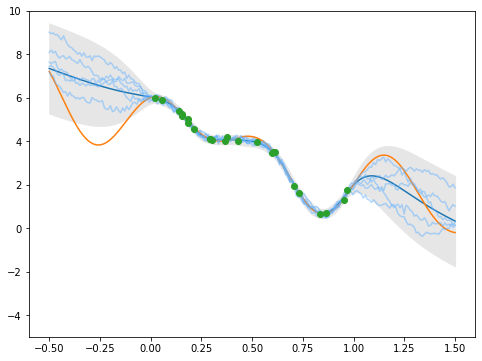

In [10]:
# Show prediction
x_test = x_test.flatten()
plt.figure(figsize=(8, 6))
plt.fill_between(x_test, (mu - unc).flatten(), (mu + unc).flatten(), color=(0.9,) * 3)
plt.plot(x_test, mu)
plt.plot(x_test, f(x_test))
for y_samp_i in y_samp:
    plt.plot(x_test, y_samp_i, color=(0.4, 0.7, 1.0), alpha=0.5)
plt.plot(x, y, 'o')
plt.ylim(-5, 10)
plt.show()